In [1]:
from google.colab import files
uploaded = files.upload()



Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [2]:
import pandas as pd
df = pd.read_csv("pima-indians-diabetes.csv",delimiter=",")
df.head()


,X1_1,X1_2,X1_3,X1_4,X1_5,X1_6,X1_7,X1_8,Y
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [3]:
# split into input (X) and output (Y) variables
X = df.iloc[:,0:8]
X.shape
Y = df.iloc[:,8]



In [4]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential



In [5]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8,  activation='relu')) #input layer
model.add(Dense(1, activation='sigmoid')) #output layer


In [6]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [8]:
# Fit the model
history = model.fit(X, Y, validation_split=0.30, epochs=250, batch_size=100)


Epoch 1/250
6/6 [==============================] - 1s 48ms/step - loss: 8.1144 - accuracy: 0.6425 - val_loss: 7.8196 - val_accuracy: 0.5758
Epoch 2/250
6/6 [==============================] - 0s 8ms/step - loss: 7.1192 - accuracy: 0.6276 - val_loss: 7.0816 - val_accuracy: 0.5758
Epoch 3/250
6/6 [==============================] - 0s 12ms/step - loss: 6.3612 - accuracy: 0.6164 - val_loss: 6.3251 - val_accuracy: 0.5541
Epoch 4/250
6/6 [==============================] - 0s 8ms/step - loss: 5.6807 - accuracy: 0.6034 - val_loss: 5.5347 - val_accuracy: 0.5541
Epoch 5/250
6/6 [==============================] - 0s 8ms/step - loss: 5.1067 - accuracy: 0.6071 - val_loss: 4.8657 - val_accuracy: 0.5498
Epoch 6/250
6/6 [==============================] - 0s 8ms/step - loss: 4.6172 - accuracy: 0.6071 - val_loss: 4.3446 - val_accuracy: 0.5368
Epoch 7/250
6/6 [==============================] - 0s 8ms/step - loss: 4.2146 - accuracy: 0.6145 - val_loss: 3.9267 - val_accuracy: 0.5584
Epoch 8/250
6/6 [========

In [9]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


24/24 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.7396
accuracy: 73.96%


In [ ]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

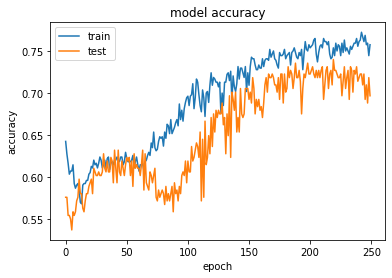

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



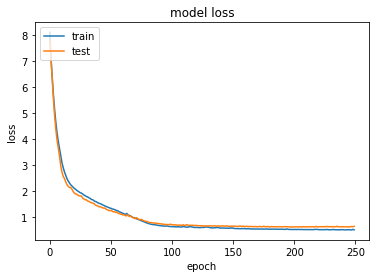

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


